In [1]:
import numpy as np
import pandas as pd
import random
import itertools
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 問題１をまっすぐ解く
X = range(1,7)
X_l = itertools.permutations(X,2)
X_sum = []

for x in X_l:
    X_sum.append(sum(x))

c = collections.Counter(X_sum)
print(X_sum)
print(c)
print(sorted(c.items()))

[3, 4, 5, 6, 7, 3, 5, 6, 7, 8, 4, 5, 7, 8, 9, 5, 6, 7, 9, 10, 6, 7, 8, 9, 11, 7, 8, 9, 10, 11]
Counter({7: 6, 5: 4, 6: 4, 8: 4, 9: 4, 3: 2, 4: 2, 10: 2, 11: 2})
[(3, 2), (4, 2), (5, 4), (6, 4), (7, 6), (8, 4), (9, 4), (10, 2), (11, 2)]


In [14]:
# 問題１を行列にする
X = range(1,7)
X_l = itertools.product(X,repeat=2)
X_matrix = np.zeros([len(X),len(X)])

for i in X_l:
    X_matrix[i[0]-1,i[1]-1] = sum(i)
    
print(X_matrix)

# https://note.nkmk.me/python-numpy-unique/
u, counts = np.unique(X_matrix, return_counts=True)
print(u)
print(counts)
print(counts/sum(counts))

[[ 2.  3.  4.  5.  6.  7.]
 [ 3.  4.  5.  6.  7.  8.]
 [ 4.  5.  6.  7.  8.  9.]
 [ 5.  6.  7.  8.  9. 10.]
 [ 6.  7.  8.  9. 10. 11.]
 [ 7.  8.  9. 10. 11. 12.]]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[1 2 3 4 5 6 5 4 3 2 1]
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


In [10]:
# 問題１の状況をシミュレーションする
n = 1000 # 一回の実験あたりに行う試行回数
N = 10000 # 実験回数
x = np.array(range(1,7)) # 取りうる値
u = np.array(range(2,13)) # さいころの目の和がとりうる値
p = np.repeat(1/len(x),len(x))
print(x,p)

[1 2 3 4 5 6] [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [11]:
# データを格納する空の行列を用意
data = np.zeros([len(u),N])

for i in range(N):
    # 指定した確率で復元抽出を実施
    # http://starpentagon.net/analytics/numpy_random_choice/
    X = np.random.choice(x, size=n, replace=True, p=p)
    Y = np.random.choice(x, size=n, replace=True, p=p)
    Z = X + Y
    # ユニークな要素の数え上げ
    ud, counts = np.unique(Z, return_counts=True)
    # 指定したインデックスに値を格納していく
    # https://note.nkmk.me/python-enumerate-start/
    for idx, j in enumerate(counts):
        data[ud[idx]-2][i] = j

print(data)

[[26. 25. 25. ... 30. 36. 34.]
 [48. 59. 50. ... 46. 58. 55.]
 [79. 75. 70. ... 79. 76. 93.]
 ...
 [95. 80. 86. ... 73. 89. 91.]
 [62. 56. 58. ... 55. 45. 58.]
 [26. 41. 30. ... 35. 31. 27.]]


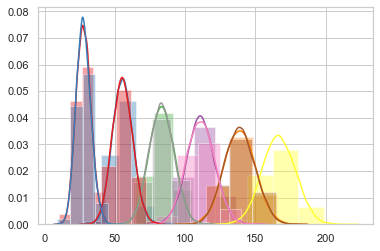

In [12]:
# https://tanuhack.com/seaborn-histgram/
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')

for i in range(data.shape[0]):
    sns.distplot(data[i],
                 bins=5)

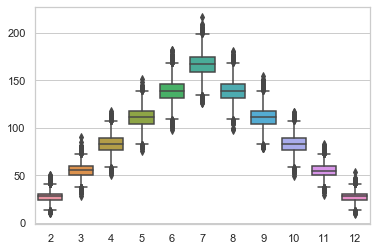

In [13]:
sns.boxplot(x=u,y=[data[i] for i in range(data.shape[0])])